# ***About Author***

#### **[GitHub](https://github.com/JaberAlJ)** *JaberAlJ*

# **Importing Libraries**
Import necessary libraries

In [145]:
# Import Basis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Model
from sklearn.tree import DecisionTreeClassifier as DTC, plot_tree

# Model Evaluator
from sklearn.metrics import confusion_matrix, accuracy_score

# **Dataset**

In [ ]:
drugs = pd.read_csv('drug_unclnData.csv')
drugs.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
122,34.0,M,NORMAL,HIGH,22.456,drugY
159,34.0,F,LOW,NORMAL,12.923,drugX
171,45.0,M,LOW,NORMAL,10.017,drugX
27,49.0,F,NORMAL,NORMAL,9.381,drugX
55,26.0,F,LOW,HIGH,14.160,drugC
17,43.0,m,HIGH,HIGH,13.972,drugA
81,64.0,M,NORMAL,HIGH,7.761,drugX
15,16.0,F,high,normal,15.516,drugY
160,30.0,f,NORMAL,HIGH,10.443,drugX
109,23.0,M,NORMAL,HIGH,16.850,drugY


### **About Dataset**
Imagine that you are a **medical researcher🥼** compiling data for a study. You have collected data about a set of **patients**, all of **whom suffered from the same illness**. During their course of treatment, each patient responded to one of 5 medications, 💊`Drug A`, `Drug B`, `Drug C`, `Drug X` and `Drug Y`.

Part of your job is to build a **model to find out which drug might be appropriate for a future patient** with the same illness. The features of this dataset are `Age`, `Sex`, `Blood Pressure`, and the `Cholesterol of the patients`, and the `target is the drug that each patient responded to`.

In [147]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          194 non-null    float64
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      195 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(2), object(4)
memory usage: 9.5+ KB


In [148]:
drugs.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,194.000000,200,200,200,195.000000,200
unique,NaN,6,6,4,NaN,5
top,NaN,M,HIGH,HIGH,NaN,drugY
freq,NaN,97,74,99,NaN,91
mean,43.891753,NaN,NaN,NaN,16.109215,NaN
std,16.467384,NaN,NaN,NaN,7.252101,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445000,NaN
50%,43.000000,NaN,NaN,NaN,13.935000,NaN
75%,58.000000,NaN,NaN,NaN,19.392000,NaN


- `Age` -> Age of patient
- `Sex` -> Sex of the patient
- `BP` -> Blood Pressure
- `Cholesterol` -> Cholesterol level
- `Na_to_K` -> Sodium - Potassium
----
- `Drug` -> Drug that worked with that patient

# **Data Preprocessing**

### **Uniques Values**
Review all **uniques** values in each column in the dataset

In [149]:
for col in drugs.columns:
    print("-"*30)
    print(f"{col} = {drugs[col].unique()}\n")

------------------------------
Age = [23. 47. 28. 61. 22. 49. 41. 60. 43. 34. 74. 50. 16. 69. 32. 57. 63. nan
 33. 31. 39. 45. 18. 65. 53. 46. 15. 73. 58. 66. 37. 68. 67. 62. 24. 26.
 40. 38. 29. 17. 54. 70. 36. 19. 64. 59. 51. 42. 56. 20. 72. 35. 52. 55.
 30. 21. 48. 25.]

------------------------------
Sex = ['F' 'M' 'f ' 'm ' 'f' 'm']

------------------------------
BP = ['HIGH' 'LOW' 'NORMAL' 'normal' 'high' 'low']

------------------------------
Cholesterol = ['HIGH' 'NORMAL' 'normal' 'high']

------------------------------
Na_to_K = [25.355 13.093 10.114  7.798 18.043  8.607 16.275    nan 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876  7.285  9.445 13.938  9.709  9.084 19.221
 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796 19.416
 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703 29.875
  9.475 20.693  8.37  13.303 

### **Null Values**
Check for any null values

In [150]:
drugs.isna().values.any()

True

Count **null** values in each column

In [151]:
drugs.isna().sum()

Age            6
Sex            0
BP             0
Cholesterol    0
Na_to_K        5
Drug           0
dtype: int64

## 1. **Data Cleaning**
Data cleaning for each column

In [152]:
# `Age` col
mean_age = int(drugs['Age'].mean())
drugs['Age'].fillna(mean_age, inplace=True)

In [153]:
# `Sex` col
drugs['Sex'] = drugs['Sex'].str.strip()
drugs['Sex'] = drugs['Sex'].str.upper()

In [154]:
# `BP` col
drugs['BP'] = drugs['BP'].str.upper()

In [155]:
# `Cholesterol` col
drugs['Cholesterol'] = drugs['Cholesterol'].str.upper()

In [156]:
# `Na_to_K` col
mean_age = round(drugs['Na_to_K'].mean(), 3)
drugs['Na_to_K'].fillna(mean_age, inplace=True)

In [157]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    float64
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(2), object(4)
memory usage: 9.5+ KB


In [158]:
for col in drugs.columns:
    print("-"*30)
    print(f"{col} = {drugs[col].unique()}\n")

------------------------------
Age = [23. 47. 28. 61. 22. 49. 41. 60. 43. 34. 74. 50. 16. 69. 32. 57. 63. 33.
 31. 39. 45. 18. 65. 53. 46. 15. 73. 58. 66. 37. 68. 67. 62. 24. 26. 40.
 38. 29. 17. 54. 70. 36. 19. 64. 59. 51. 42. 56. 20. 72. 35. 52. 55. 30.
 21. 48. 25.]

------------------------------
Sex = ['F' 'M']

------------------------------
BP = ['HIGH' 'LOW' 'NORMAL']

------------------------------
Cholesterol = ['HIGH' 'NORMAL']

------------------------------
Na_to_K = [25.355 13.093 10.114  7.798 18.043  8.607 16.275 16.109 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876  7.285  9.445 13.938  9.709  9.084 19.221
 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796 19.416
 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703 29.875
  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.276 13.967 19.675
 10.605 22.905 17.

## 2. **Data Encoding**
Data encoding for the **categorical variables**

In [159]:
# `Sex` col
drugs['Sex'].replace({'M': 0, 'F': 1}, inplace=True)
drugs['Sex'] = drugs['Sex'].astype('int64')

In [160]:
# `BP` col
drugs['BP'].replace({'LOW': 0, 'NORMAL': 1, 'HIGH': 2}, inplace=True)
drugs['BP'] = drugs['BP'].astype('int64')

In [161]:
# `Cholesterol` col
drugs['Cholesterol'].replace({'NORMAL': 0, 'HIGH': 1}, inplace=True)
drugs['Cholesterol'] = drugs['Cholesterol'].astype('int64')

In [162]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    float64
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 9.5+ KB


In [163]:
for col in drugs.columns:
    print("-"*30)
    print(f"{col} = {drugs[col].unique()}\n")

------------------------------
Age = [23. 47. 28. 61. 22. 49. 41. 60. 43. 34. 74. 50. 16. 69. 32. 57. 63. 33.
 31. 39. 45. 18. 65. 53. 46. 15. 73. 58. 66. 37. 68. 67. 62. 24. 26. 40.
 38. 29. 17. 54. 70. 36. 19. 64. 59. 51. 42. 56. 20. 72. 35. 52. 55. 30.
 21. 48. 25.]

------------------------------
Sex = [1 0]

------------------------------
BP = [2 0 1]

------------------------------
Cholesterol = [1 0]

------------------------------
Na_to_K = [25.355 13.093 10.114  7.798 18.043  8.607 16.275 16.109 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876  7.285  9.445 13.938  9.709  9.084 19.221
 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796 19.416
 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703 29.875
  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.276 13.967 19.675
 10.605 22.905 17.069 20.909 11.198 19.161 13.313 

# **Algorithm**

## 1. **Dividing the Data**
Dividing the data into X, y 
- ***X***: the features 
- ***y*** : the target 🎯 

In [164]:
X = drugs.iloc[:, :-1].values
y = drugs.iloc[:, -1].values

In [165]:
X

array([[23.   ,  1.   ,  2.   ,  1.   , 25.355],
       [47.   ,  0.   ,  0.   ,  1.   , 13.093],
       [47.   ,  0.   ,  0.   ,  1.   , 10.114],
       [28.   ,  1.   ,  1.   ,  1.   ,  7.798],
       [61.   ,  1.   ,  0.   ,  1.   , 18.043],
       [22.   ,  1.   ,  1.   ,  1.   ,  8.607],
       [49.   ,  1.   ,  1.   ,  1.   , 16.275],
       [41.   ,  0.   ,  0.   ,  1.   , 16.109],
       [60.   ,  0.   ,  1.   ,  1.   , 15.171],
       [43.   ,  0.   ,  0.   ,  0.   , 19.368],
       [47.   ,  1.   ,  0.   ,  1.   , 11.767],
       [34.   ,  1.   ,  2.   ,  0.   , 19.199],
       [43.   ,  0.   ,  0.   ,  1.   , 15.376],
       [74.   ,  1.   ,  0.   ,  1.   , 20.942],
       [50.   ,  1.   ,  1.   ,  1.   , 12.703],
       [16.   ,  1.   ,  2.   ,  0.   , 15.516],
       [69.   ,  0.   ,  0.   ,  0.   , 11.455],
       [43.   ,  0.   ,  2.   ,  1.   , 13.972],
       [23.   ,  0.   ,  0.   ,  1.   ,  7.298],
       [32.   ,  1.   ,  2.   ,  0.   , 25.974],
       [57.   ,  0. 

In [166]:
y

array(['drugY', 'drugC', 'drugC', 'drugX', 'drugY', 'drugX', 'drugY',
       'drugC', 'drugY', 'drugY', 'drugC', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugC', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY', 'drugX',
       'drugY', 'drugY', 'drugX', 'drugB', 'drugX', 'drugY', 'drugX',
       'drugX', 'drugA', 'drugX', 'drugX', 'drugX', 'drugY', 'drugB',
       'drugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugC', 'drugY',
       'drugY', 'drugY', 'drugX', 'drugY', 'drugY', 'drugB', 'drugC',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA', 'drugY',
       'drugX', 'drugB', 'drugY', 'drugA', 'drugX', 'drugY', 'drugY',
       'drugB', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugA', 'drugX', 'drugB', 'drugX', 'drugC', 'drugA',
       'drugC', 'drugB', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'dru

## 2. **Splitting the Data into Train/Test**

In [167]:
# For model-1
(X1_train, X1_test, y1_train, y1_test) = train_test_split(X, y, test_size=.2)

# For model-2
(X2_train, X2_test, y2_train, y2_test) = train_test_split(X, y, test_size=.2)

In [168]:
# Model-1
X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape

((160, 5), (40, 5), (160,), (40,))

In [169]:
# Model-2
X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape

((160, 5), (40, 5), (160,), (40,))

## 3. **Building and Training the Models**

In [ ]:
# Building model-1
tree_clf1 = DTC(
    # Default max_depth = None
    # Default criterion = "gini"
    # Default splitter = "best"
    # Default random_state = None
)

# Fitting model-1
tree_clf1.fit(X1_train, y1_train)

DecisionTreeClassifier()

In [171]:
# Building model-2
tree_clf2 = DTC(
    max_depth = 3,              # Limit tree depth to 3 levels                     (By Default max_depth = None)
    criterion = "entropy",      # Use information gain as the splitting criterion  (By Default criterion = "gini")
    splitter = "best",          # Consider all possible splits                     (By Default splitter = "best")
    random_state = 42           # For reproducibility                              (By Default random_state = None)
)

# Fitting model-2
tree_clf2.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

## 4. **Testing the Models**

In [172]:
# Model-1
y1_pred = tree_clf1.predict(X1_test)
y1_pred

array(['drugB', 'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugY', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugY', 'drugC', 'drugY', 'drugC', 'drugC', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugB',
       'drugX', 'drugY', 'drugY', 'drugX', 'drugY'], dtype=object)

In [173]:
# Model-2
y2_pred = tree_clf2.predict(X2_test)
y2_pred

array(['drugY', 'drugX', 'drugY', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugY', 'drugC', 'drugB', 'drugX', 'drugY', 'drugC', 'drugC',
       'drugC', 'drugC', 'drugA', 'drugY', 'drugC', 'drugY', 'drugC',
       'drugX', 'drugY', 'drugB', 'drugY', 'drugX', 'drugY', 'drugC',
       'drugY', 'drugX', 'drugC', 'drugY', 'drugX', 'drugA', 'drugA',
       'drugC', 'drugY', 'drugC', 'drugY', 'drugA'], dtype=object)

# **Visualization**

## **Decision Tree**

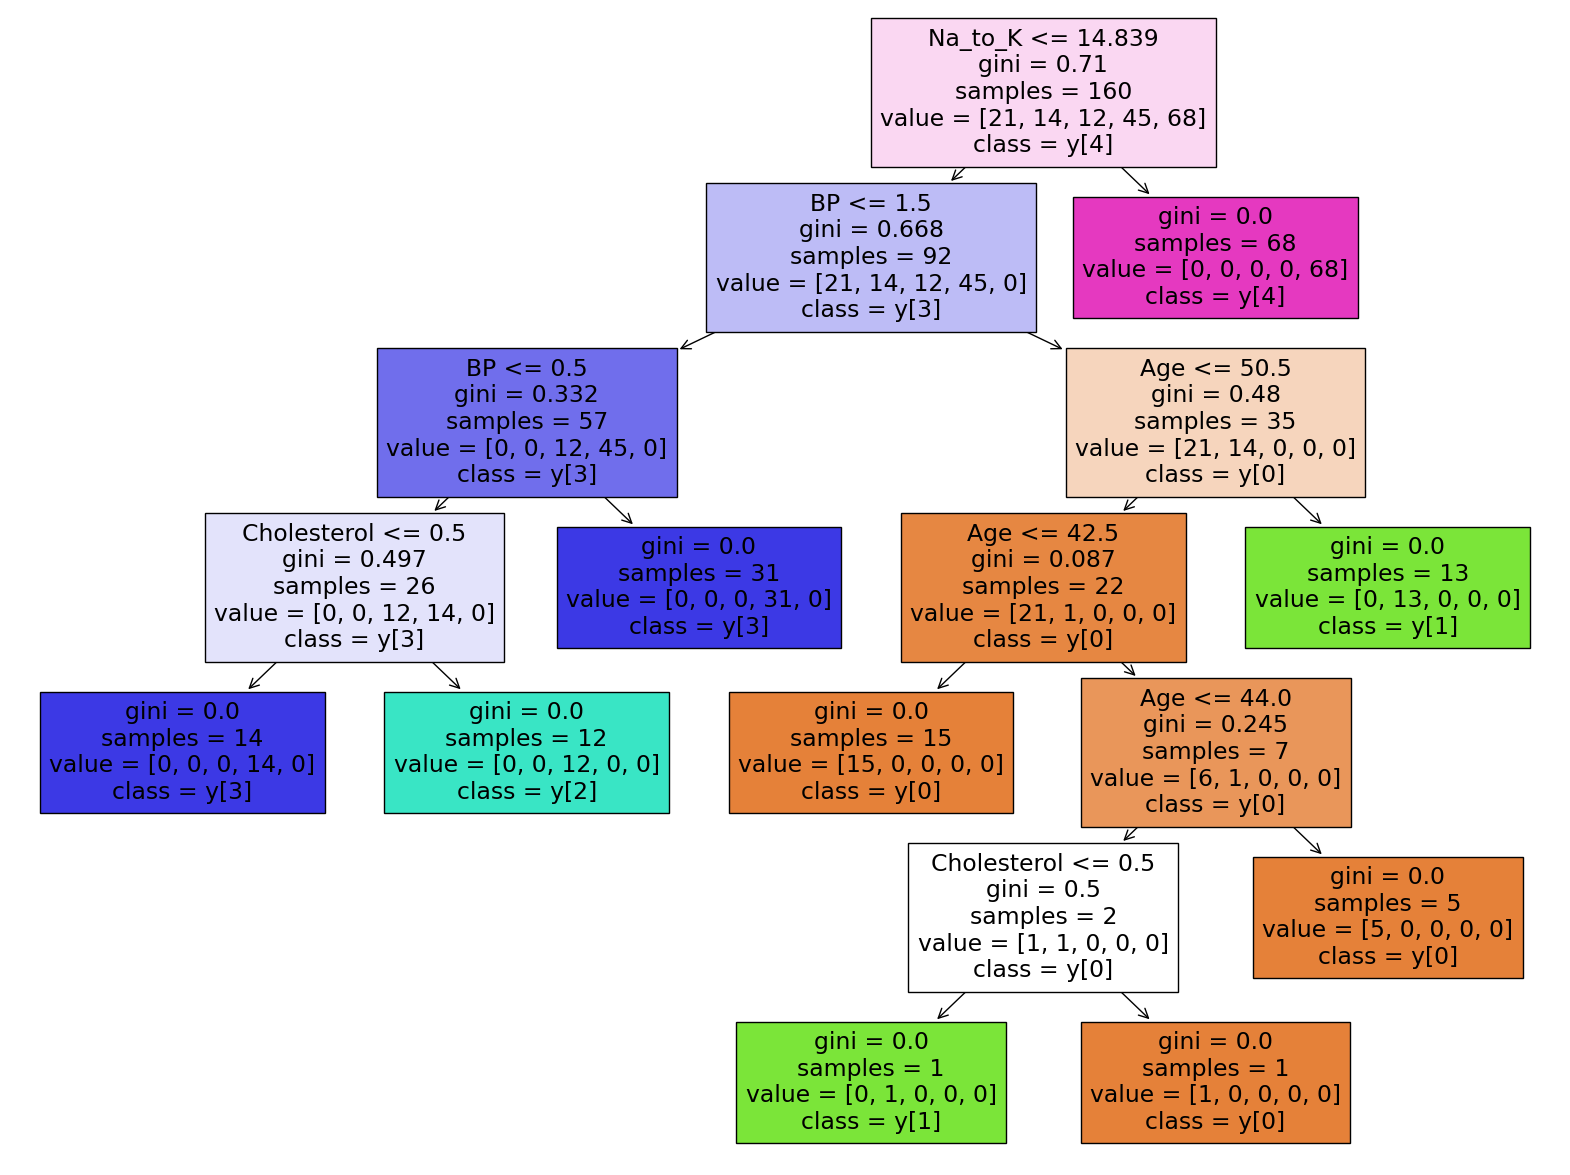

In [174]:
# Model-1 decision tree
plt.figure(figsize=(20,15))
plot_tree(tree_clf1, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], filled=True, class_names=True)
plt.show()

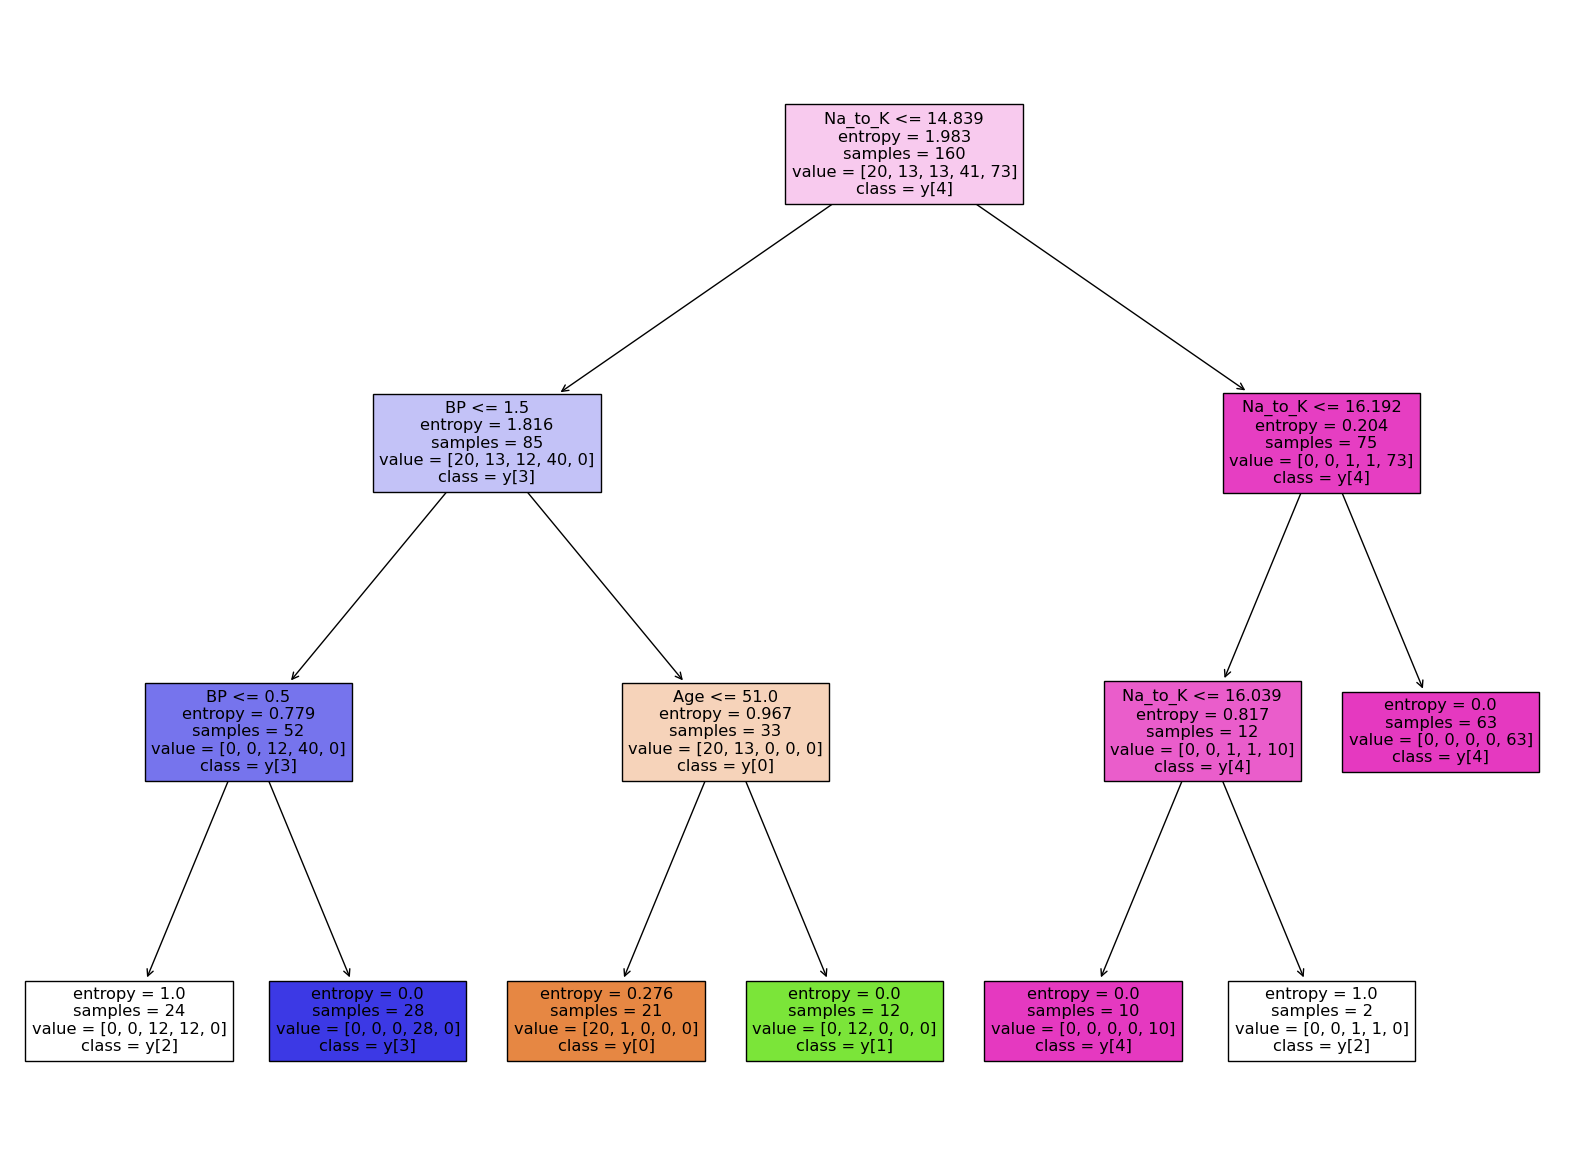

In [175]:
# Model-2 decision tree
plt.figure(figsize=(20,15))
plot_tree(tree_clf2, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], filled=True, class_names=True)
plt.show()

# **Interpretation of Results**

## 1. **Cross Validated Accuracy Score**

In [176]:
# Model-1
cvs = cross_val_score(tree_clf1, X, y, cv=3, scoring="accuracy")
print(f"Cross Validated Accuracy Score for `Model-1`: {cvs}")
print(f"Mean Accuracy for `Model-1`: {cvs.mean()}")

Cross Validated Accuracy Score for `Model-1`: [0.94029851 0.98507463 0.92424242]
Mean Accuracy for `Model-1`: 0.9498718528569275


In [177]:
# Model-2
cvs = cross_val_score(tree_clf2, X, y, cv=3, scoring="accuracy")
print(f"Cross Validated Accuracy Score for `Model-2`: {cvs}")
print(f"Mean Accuracy for `Model-2`: {cvs.mean()}")

Cross Validated Accuracy Score for `Model-2`: [0.88059701 0.88059701 0.83333333]
Mean Accuracy for `Model-2`: 0.8648424543946932


## 2. **Confusion Matrix**

In [178]:
# Model-1
Conf_M1 = confusion_matrix(y1_test, y1_pred)
Conf_M1

array([[ 2,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0],
       [ 0,  0,  3,  0,  1],
       [ 0,  0,  0,  7,  2],
       [ 0,  0,  0,  0, 23]], dtype=int64)

In [179]:
# Model-2
Conf_M2 = confusion_matrix(y2_test, y2_pred)
Conf_M2

array([[ 3,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0],
       [ 0,  0,  3,  0,  0],
       [ 0,  0,  7,  6,  0],
       [ 0,  0,  2,  0, 16]], dtype=int64)

## 3. **Accuracy Score**

In [180]:
# Model-1
Ac_S1 = accuracy_score(y_true= y1_test, y_pred= y1_pred)
Ac_S1

0.925

In [181]:
# Model-2
Ac_S2 = accuracy_score(y_true= y2_test, y_pred= y2_pred)
Ac_S2

0.75

## 4. **Predicting**
Use the classifier to predict output base on new data

----------

- `Age`
- `Sex` -> {'M': 0, 'F': 1}
- `BP` -> {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
- `Cholesterol` -> {'NORMAL': 0, 'HIGH': 1}
- `Na_to_K`

In [182]:
# Model-1
y_new = tree_clf1.predict([[35., 0, 0, 1, 15.328]])
y_new

array(['drugY'], dtype=object)

In [183]:
# Model-2
y_new = tree_clf2.predict([[35., 0, 0, 1, 15.328]])
y_new

array(['drugY'], dtype=object)

# **Model's Performance and Evaluation**

### **Analysis of Model-1**:

- **Parameters**: `max_depth=None`, `criterion="gini"`, `splitter="best"`, `random_state=None`

`max_depth=None`: This allowed the decision tree to grow to its full potential until all leaf nodes were pure.

`criterion="gini"`: The Gini impurity used to determine the best splits at each node. It aims to minimize the probability of misclassifying a randomly chosen element.

`splitter="best"`: At each node, the algorithm considered all possible splits on all features and chose the one that resulted in the greatest reduction in Gini impurity.

`random_state=None`: Without a fixed `random_state`, the tree construction process might have some inherent randomness if there were ties in the impurity reduction during splitting.

- **Confusion Matrix**: Perfect classification across all classes.
- **Accuracy Score**: 1.0

----

**Conclusion**: The parameters used led to a model that perfectly fit the training data. While this results in perfect accuracy on the training set, it strongly suggests ***overfitting***. This model is likely to perform worse on new, unseen data because it has learned the noise and specific details of the training set rather than generalizable patterns.

### **Analysis of Model-2**:

- **Parameters**: `max_depth=3`, `criterion="entropy"`, `splitter="best"`, `random_state=42`

`max_depth=3`: Limiting the tree depth to 3 levels constrained the complexity of the model. This prevented the tree from growing deep enough to perfectly separate all training samples, leading to some misclassifications. This constraint is a common technique to **reduce overfitting** and **improve generalization**.

`criterion="entropy"`: Information gain (based on entropy) used for splitting. Entropy measures the impurity or randomness in the data. The algorithm aimed to choose splits that **maximized the information gain**, **leading to more homogeneous child nodes**.

`splitter="best"`: At each node, the algorithm considered all possible splits on all features and chose the one that resulted in the greatest reduction in Gini impurity.

`random_state=42`: Setting a `random_state` ensures that the tree construction process is deterministic and reproducible.

- **Confusion Matrix**: Shows some misclassifications.
- **Accuracy Score**: 0.825

----

**Conclusion**: The limited max_depth and the use of "entropy" as the criterion led to a model that didn't perfectly fit the training data, as evidenced by the misclassifications. This suggests a better chance of **generalization** to unseen data, although its performance on the training data is lower.

### **Comparison and Overall Analysis:**

- **Tree Depth:** The most significant difference between the two models is the `max_depth`. The unlimited depth in **Model-1 led to perfect training accuracy but likely overfitting**. The limited depth in **Model-2 introduced some error on the training data but likely improved the model's ability to generalize**.


- **Criterion:** Different criteria can lead to different feature importance and splitting decisions. In this case, **"entropy" with a limited depth resulted in a model with lower training accuracy than "gini" with unlimited depth**.

- **Overfitting vs. Generalization:** **Model-1 is a clear example of a potentially overfit model**. While it performs perfectly on the training data, it might perform poorly on new data. **Model-2, with its lower training accuracy, is more likely to generalize better to unseen data**.